# Spotify Most Streamed
#### Creator: Njabulo Hlatshwayo 220007199<br>Date: 14 April 2023<br>Source: https://www.kaggle.com/datasets/prasertk/spotify-global-2019-moststreamed-tracks<br>Github url:https://github.com/Njabie-H/Assignment_3.git <br>

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------

# Part one:

#### Dataset:<br> This dataset includes audio features and artist information of spotify most-streamed tracks globally in 2019. Total streams are calculated by summing up daily streams of each track. The following analysis involves descriptive statistics and correlation of the information provided in the dataset to test some theories. 



In [10]:
import pandas as pd 
from scipy import stats 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns 
import math

streams_dt = pd.read_csv('2019_Spotify_most_streamed_.csv')

streams_dt.head(1000)

,Country,Rank,Track_id,Streams,Track Name,Artist,URL,acousticness,danceability,energy,...,valence,tempo,time_signature,duration_ms,key,mode,Artist_id,Artist_popularity,Artist_follower,Artist_img
0,global,1.0,25sgk305KZfyuqVBQIahim,1166185736,Sweet but Psycho,Ava Max,https://open.spotify.com/track/25sgk305KZfyuqV...,0.0691,0.719,0.704,...,0.628,133.002,4,187436,1,1,4npEfmQ6YuiwW1GpUmaq3F,87,1025358,https://i.scdn.co/image/4b914c6470c8458674538a...
1,global,2.0,2Fxmhks0bxGSBdJ92vM42m,1052358787,bad guy,Billie Eilish,https://open.spotify.com/track/2Fxmhks0bxGSBdJ...,0.3280,0.701,0.425,...,0.562,135.128,4,194088,7,1,6qqNVTkY8uBg9cP3Jd7DAH,98,18867904,https://i.scdn.co/image/2622edec99d68d1d141886...
2,global,3.0,6ocbgoVGwYJhOv1GgI9NsF,789094044,7 rings,Ariana Grande,https://open.spotify.com/track/6ocbgoVGwYJhOv1...,0.5920,0.778,0.317,...,0.327,140.048,4,178627,1,0,66CXWjxzNUsdJxJ2JdwvnR,97,40958727,https://i.scdn.co/image/b1dfbe843b0b9f54ab2e58...
3,global,4.0,1rgnBhdG2JDFTbYkYRZAku,764208309,Dance Monkey,Tones and I,https://open.spotify.com/track/1rgnBhdG2JDFTbY...,0.6880,0.825,0.593,...,0.540,98.078,4,209755,6,0,2NjfBq1NflQcKSeiDooVjY,92,484241,https://i.scdn.co/image/c128f5ef4d210a67610acd...
4,global,5.0,6v3KW9xbzN5yKLt9YKDYA2,763064359,Señorita,Shawn Mendes,https://open.spotify.com/track/6v3KW9xbzN5yKLt...,0.0392,0.759,0.548,...,0.749,116.967,4,190800,9,0,7n2wHs1TKAczGzO7Dd2rGr,94,23152263,https://i.scdn.co/image/6bd59cfbd3e1e6394af710...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,global,996.0,01iuzK2ziYAVE2n9aSXbWp,5585004,Hollywood's Bleeding,Post Malone,https://open.spotify.com/track/01iuzK2ziYAVE2n...,0.3310,0.404,0.645,...,0.158,130.215,4,156253,4,0,246dkjvS1zLTtiykXe5h60,100,21335421,https://i.scdn.co/image/93fec27f9aac86526b9010...
996,global,997.0,2BM7nF0pMIpLQOT04o691Z,5579926,Hurts 2B Human (feat. Khalid),P!nk,https://open.spotify.com/track/2BM7nF0pMIpLQOT...,0.1310,0.463,0.620,...,0.158,83.031,1,202640,7,1,1KCSPY1glIKqW2TotWuXOR,86,7714421,https://i.scdn.co/image/afc2d276d9c1b398d4f104...
997,global,998.0,0rzNMzZsubFcXSEh7dnem7,5574100,Hold Up,Beyoncé,https://open.spotify.com/track/0rzNMzZsubFcXSE...,0.7450,0.524,0.397,...,0.552,80.744,4,221093,0,1,6vWDO969PvNqNYHIOW5v0m,90,21495344,https://i.scdn.co/image/9fef2047e4e3f05031807d...
998,global,999.0,3L19besdNQzd342qL78xqm,5565198,Demons and Angels (feat. Juice WRLD),A Boogie Wit da Hoodie,https://open.spotify.com/track/3L19besdNQzd342...,0.0114,0.810,0.550,...,0.183,76.503,4,214593,2,0,31W5EY0aAly4Qieq6OFu6I,91,3899600,https://i.scdn.co/image/b7d26110180d7fb0709757...


## Clean Dataset:

In [57]:
streams_dt.drop(streams_dt.columns[0], axis = 1, inplace = True)
streams_dt.head(1000)

streams_dt.drop(streams_dt.columns[1], axis = 1, inplace = True)
streams_dt.head(1000)

streams_dt.drop(streams_dt.columns[4], axis = 1, inplace = True)
streams_dt.head(1000)


streams_dt.drop(streams_dt.columns[20], axis = 1, inplace = True)
streams_dt.head(1000)

streams_dt.drop(streams_dt.columns[17], axis = 1, inplace = True)
streams_dt.head(1000)

,Rank,Streams,Track Name,Artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,duration_ms,key,mode,Artist_popularity,Artist_follower
0,1.0,1166185736,Sweet but Psycho,Ava Max,0.0691,0.719,0.704,0.000000,0.1660,-4.724,0.0476,0.628,133.002,4,187436,1,1,87,1025358
1,2.0,1052358787,bad guy,Billie Eilish,0.3280,0.701,0.425,0.130000,0.1000,-10.965,0.3750,0.562,135.128,4,194088,7,1,98,18867904
2,3.0,789094044,7 rings,Ariana Grande,0.5920,0.778,0.317,0.000000,0.0881,-10.732,0.3340,0.327,140.048,4,178627,1,0,97,40958727
3,4.0,764208309,Dance Monkey,Tones and I,0.6880,0.825,0.593,0.000161,0.1700,-6.401,0.0988,0.540,98.078,4,209755,6,0,92,484241
4,5.0,763064359,Señorita,Shawn Mendes,0.0392,0.759,0.548,0.000000,0.0828,-6.049,0.0290,0.749,116.967,4,190800,9,0,94,23152263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996.0,5585004,Hollywood's Bleeding,Post Malone,0.3310,0.404,0.645,0.000000,0.1040,-3.221,0.0479,0.158,130.215,4,156253,4,0,100,21335421
996,997.0,5579926,Hurts 2B Human (feat. Khalid),P!nk,0.1310,0.463,0.620,0.000000,0.0619,-5.647,0.1670,0.158,83.031,1,202640,7,1,86,7714421
997,998.0,5574100,Hold Up,Beyoncé,0.7450,0.524,0.397,0.000000,0.5210,-11.936,0.4050,0.552,80.744,4,221093,0,1,90,21495344
998,999.0,5565198,Demons and Angels (feat. Juice WRLD),A Boogie Wit da Hoodie,0.0114,0.810,0.550,0.000006,0.1070,-7.460,0.1700,0.183,76.503,4,214593,2,0,91,3899600


## Descriptive Stats (Covered in class):
##### 1. Sum:

In [60]:
sum(streams_dt.Streams)

88703228519

##### 2. Average/ Mean:

In [29]:
def mean(stream): 
    return sum(stream)/len(stream)

mean(streams_dt.Streams)

51661752.19510774

##### 3. Median

In [70]:
def median(stream):
    n = len(stream)
    sorted_stream = sorted(stream)
    midpoint = n // 2


    if n % 2 == 1:
        return sorted_stream[midpoint]
    else:
        return mean([sorted_stream[midpoint-1], sorted_stream[midpoint]])

median(streams_dt.Streams)

9623926

##### 4. Mode: 
###### We are calculating the most common time signature of the songs

In [121]:
def mode(Time_signature):
    modes = [('',0)]
    for x,y in Time_signature.items():
        highest_count = modes[0][1]
        if y > highest_count:
            modes = [(x,y)]
        elif y == highest_count:
            modes.append((x,y))
            
    return modes

mode(streams_dt.time_signature)

[(32, 5),
 (117, 5),
 (154, 5),
 (174, 5),
 (256, 5),
 (369, 5),
 (460, 5),
 (487, 5),
 (594, 5),
 (763, 5),
 (771, 5),
 (817, 5),
 (861, 5),
 (882, 5),
 (924, 5),
 (932, 5),
 (1084, 5),
 (1088, 5),
 (1156, 5),
 (1245, 5),
 (1334, 5),
 (1383, 5),
 (1403, 5),
 (1404, 5),
 (1512, 5),
 (1626, 5),
 (1649, 5),
 (1659, 5)]

#### 5. Percentiles

In [16]:
from math import ceil
def pct_value(Artist_popularity, pct):
    sorted_vals = sorted(Artist_popularity)
    n = len(Artist_popularity)
    return sorted_vals[ceil(n*pct)]
    
for pct in [.25, .5, .75]:
    print("Percentile {}%: {}".format(pct*100, pct_value(streams_dt.Artist_popularity, pct)))


Percentile 25.0%: 83
Percentile 50.0%: 87
Percentile 75.0%: 93


#### 6. The boxplot:

<Axes: >

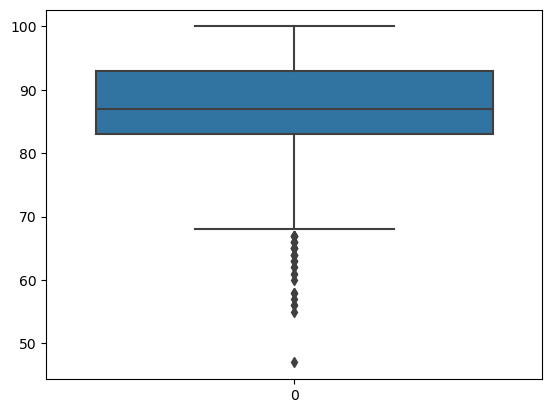

In [11]:
sns.boxplot(streams_dt.Artist_popularity)

##### 7. Weighted mean:


In [14]:
def weighted_average(Streams,weights):
    return round(sum([streams_dt.Streams[i]*weights[i] for i in range(len(streams_dt.Streams))])/sum(weights),2)

weighted_average(streams_dt.Streams,streams_dt.Rank)

12481408.43

##### 8. 5 Number Summary:

In [132]:
print("Max: {}\nMin: {}\nRange: {}".format(
max(streams_dt.Artist_popularity),
min(streams_dt.Artist_popularity),
max(streams_dt.Artist_popularity) - min(streams_dt.Artist_popularity)))

print("1st quartile: {}\n3rd quartile: {}".format(
pct_value(streams_dt.Artist_popularity, .25),
pct_value(streams_dt.Artist_popularity, .75)))

Max: 100
Min: 47
Range: 53
1st quartile: 83
3rd quartile: 93


##### 9. Variance: 

In [79]:
def variance(stream):
    n = len(stream)
    m = mean(stream)
    variance = 0 
    for x in stream:
        variance += (x - m)**2
    return variance/n

variance(streams_dt.Streams)

1.0966843424320786e+16

##### 10. Inter-quartile Range:

In [17]:
print("75th: {}\n25th: {}\nIQR: {}".format(
pct_value(streams_dt.Artist_popularity, .75),
pct_value(streams_dt.Artist_popularity, .25),
pct_value(streams_dt.Artist_popularity, .75) - pct_value(streams_dt.Artist_popularity, .25)
))

75th: 93
25th: 83
IQR: 10


##### 11. Standard deviation: 

In [26]:
def variance(stream, ddof=0):
    n = len(stream)
    mean = sum(stream) / n
    return sum ((x - mean)** 2 for x in stream) / (n - ddof)

def stdev(stream):
    var = variance(stream)
    std_dev = math.sqrt(var)
    return std_dev


stdev(streams_dt.Streams)

104722697.75135086

##### 12. Skewness:

In [66]:
from scipy.stats import skew

print(skew(streams_dt.Streams, axis = 0, bias = True))

3.9763658525194527


##### 13. Quartiles:

In [19]:
print("25th: {}\n50th/Median: {}\n75th: {}".format(
pct_value(streams_dt.Artist_popularity, .25),
pct_value(streams_dt.Artist_popularity, .50),  
pct_value(streams_dt.Artist_popularity, .75)))
    

25th: 83
50th/Median: 87
75th: 93


##### 14. Coefficient of Variation:

In [42]:
def mean(stream): 
    return sum(stream)/len(stream)

def variance(stream, ddof=0):
    n = len(stream)
    mean = sum(stream) / n
    return sum ((x - mean)** 2 for x in stream) / (n - ddof)

def stdev(stream):
    var = variance(stream)
    std_dev = math.sqrt(var)
    return std_dev

stdev((streams_dt.Streams)*100)/(mean(streams_dt.Streams)*100)

2.0270837380011995

##### 15. Correlation coefficient:

In [22]:
def correlation(x,y):
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    
    numerator = sum([sub_x[i]*sub_y[i]for i in range(len(sub_x))])
    std_deviation_x = sum([sub_x[i]**2.0 for i in range(len(sub_x))])
    std_deviation_y = sum([sub_y[i]**2.0 for i in range(len(sub_y))])
    
    denominator = (std_deviation_x*std_deviation_y)**0.5
    cor = numerator/denominator
    return cor

cor_func = correlation(streams_dt.Artist_popularity, streams_dt.Rank)
print("Correlation of Artist popularity to Artist Ranking:", cor_func)
    

Correlation of Artist popularity to Artist Ranking: -0.2876637982624221


##### 16. Covariance

In [43]:
def covariance(x,y):
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))

    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return cov

cov_func = covariance(streams_dt.Rank,streams_dt.Artist_popularity)
print("Covariance of Artist popularity to their rankings:", cov_func)


Covariance of Artist popularity to their rankings: -1113.6346153846155


##### 17. Geometric mean:

In [55]:
from scipy.stats import gmean

print(gmean(streams_dt.Streams))

10140649.311780509


##### 18. Range:

In [44]:
max(streams_dt.Artist_popularity) - min(streams_dt.Artist_popularity)

53

##### 19. Empirical Rule: 

In [70]:
def calc_empirical(x):
    x_mean = mean(x)
    print("Mean is: ", x_mean)
    
    x_std = stdev(x)
    print("Standard deviation is: ", x_std)
    
    sd_68_low = (x_mean - x_std)
    sd_68_high = (x_mean + x_std)
    print("68% falls between: ", sd_68_low, "and", sd_68_high)
    sd_95_low = (x_mean - 2*x_std)
    sd_95_high = (x_mean + 2*x_std)
    print("95% falls between: ", sd_95_low, "and", sd_95_high)
    sd_99_low = (x_mean - 3*x_std)
    sd_99_high = (x_mean + 3*x_std)
    print("99.7% falls between: ", sd_99_low, "and", sd_99_high)
    return sd_68_low, sd_68_high, sd_95_low, sd_95_high, sd_99_low, sd_99_high

calc_empirical(streams_dt.Streams)

Mean is:  51661752.19510774
Standard deviation is:  104722697.75135086
68% falls between:  -53060945.55624312 and 156384449.9464586
95% falls between:  -157783643.307594 and 261107147.69780946
99.7% falls between:  -262506341.05894482 and 365829845.44916034


(-53060945.55624312,
 156384449.9464586,
 -157783643.307594,
 261107147.69780946,
 -262506341.05894482,
 365829845.44916034)

 ##### 20. Z-Scores:

In [71]:
import  scipy.stats as stats

zscores = stats.zscore(streams_dt.Artist_popularity)
print(zscores)

0      -0.031635
1       1.377549
2       1.249441
3       0.608903
4       0.865118
          ...   
1712    0.352688
1713   -2.081358
1714   -1.056496
1715   -0.415958
1716   -0.415958
Name: Artist_popularity, Length: 1717, dtype: float64


## Descriptive Stats (Not covered in class):

##### 1. Count: 

In [110]:
streams_dt.Artist.count()

1717

##### 2. Kutosis:

In [67]:
from scipy.stats import kurtosis
print(kurtosis(streams_dt.Streams, axis = 0, bias = True))

22.45459928042667


##### 3. Shape:

In [112]:
streams_dt.shape

(1717, 24)

##### 4. Trimmed mean: 
###### calculate 10% of the trimmed mean 

In [115]:
stats.trim_mean(streams_dt.Streams, 0.1)

26007879.772363637

##### 5. Harmonic mean:

In [116]:
def harmonic_mean(stream):
    sum_recip = sum(1/x for x in stream)
    return len(stream)/sum_recip

harmonic_mean(streams_dt.Streams)

2652145.0869555054

## Graphs:

Text(0.5, 1.0, 'Artist popularity\n')

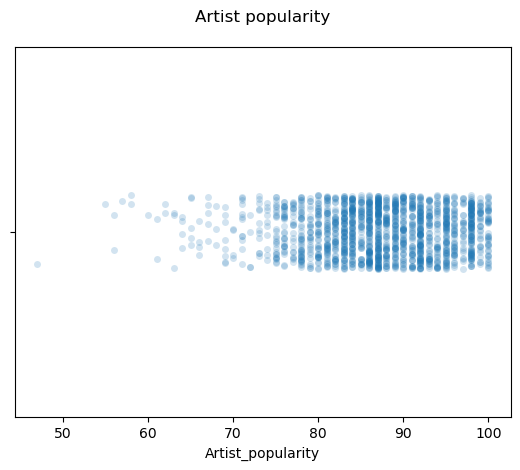

In [65]:
sns.stripplot(x=streams_dt.Artist_popularity, jitter = True, alpha= 0.2)
plt.title("Artist popularity\n")

<function matplotlib.pyplot.show(close=None, block=None)>

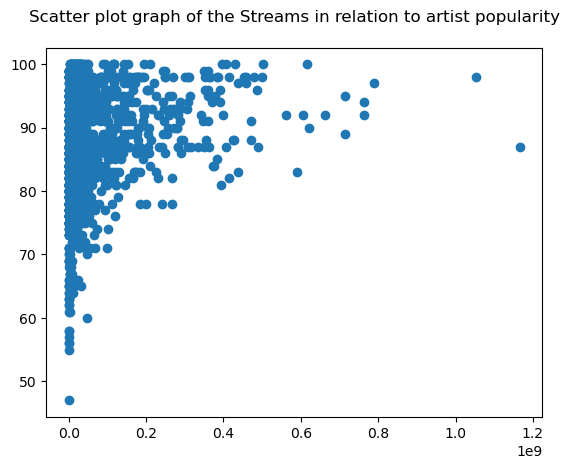

In [64]:
plt.scatter(streams_dt['Streams'], streams_dt['Artist_popularity'])
plt.title("Scatter plot graph of the Streams in relation to artist popularity\n")
plt.show

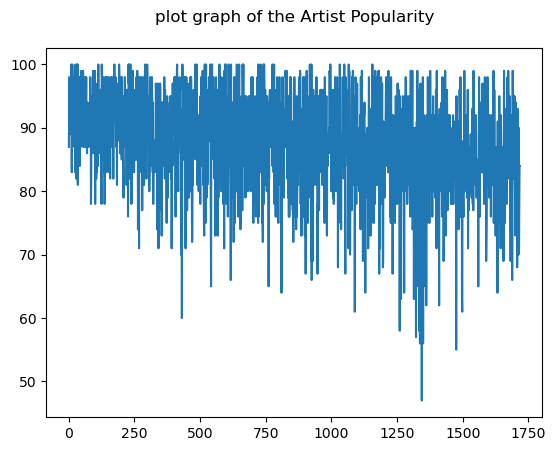

In [63]:
x = (streams_dt.Rank)
y = (streams_dt.Artist_popularity)

plt.plot(x,y)
plt.title("plot graph of the Artist Popularity\n")
plt.show(20)

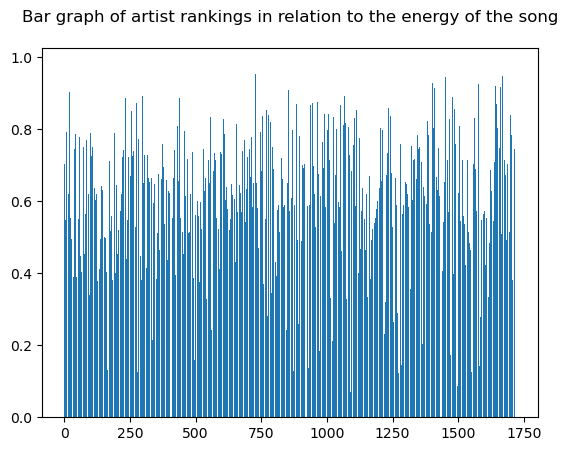

In [62]:
x = (streams_dt.Rank)
y = (streams_dt.energy)

plt.bar(x,y)
plt.title("Bar graph of artist rankings in relation to the energy of the song\n")
plt.show()

C:\Users\buloh\AppData\Local\Temp\ipykernel_7040\1123653011.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = streams_dt.corr()


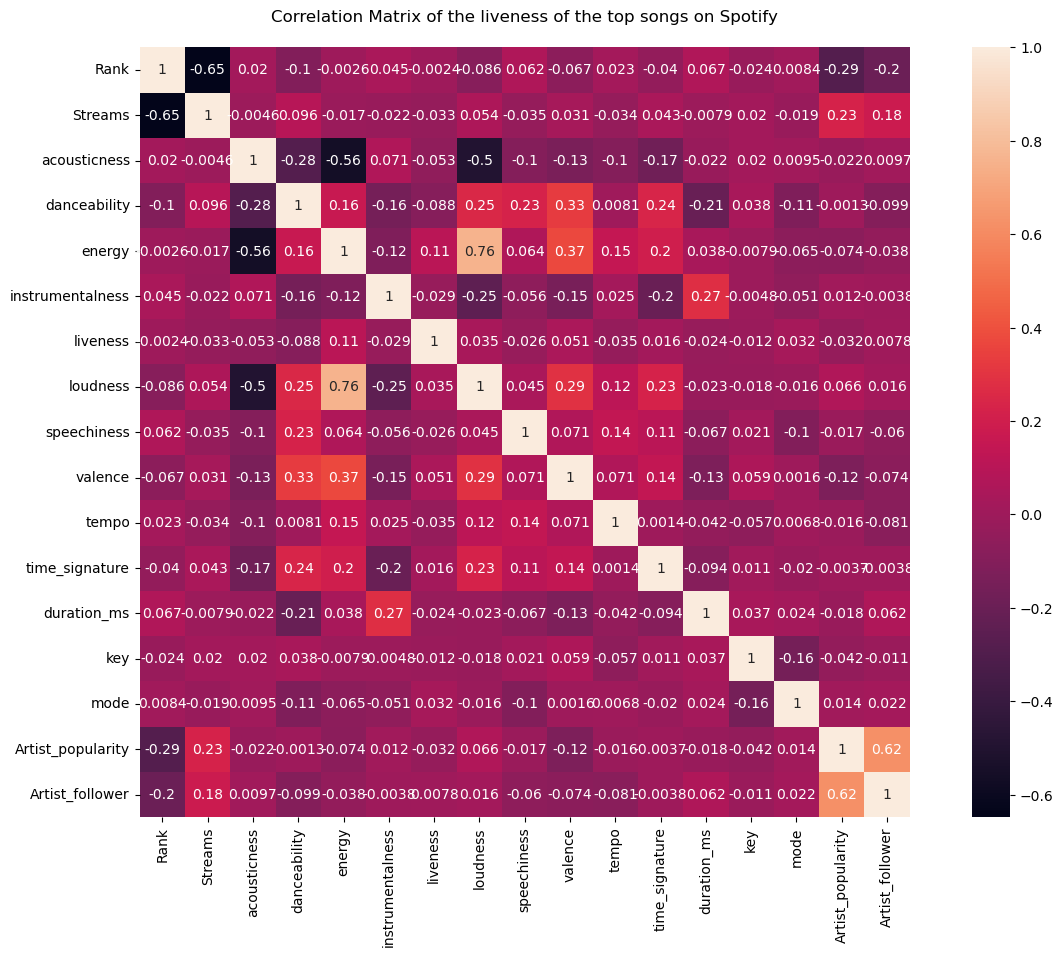

In [60]:
f, ax = plt.subplots(figsize=(16,10))
corr = streams_dt.corr()

sns.heatmap(corr, mask = np.zeros_like(corr, dtype = bool), square = True, annot = True, ax=ax)
plt.title("Correlation Matrix of the liveness of the top songs on Spotify\n")
plt.show()

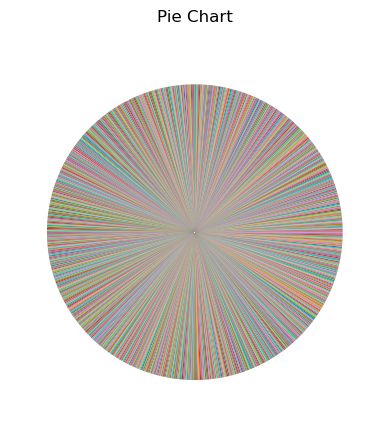

In [81]:
y = (streams_dt.key)

plt.pie(y)
plt.title("Pie Chart\n")
plt.show()

# Reflections on Learnings:

##### Difference between Python & Excel?

###### The difference between this assignment and the earlier one is that it was easier to understand what I am doing on Jupyter Notebook than Excel. The assignment on Excel became tedious because I manually had to calculate and select each descriptive statistics formula. Python has built-in functions that automatically input a response from selecting a function. Because I was dealing with a large volume of data, with the excel assignment my laptop crashed, prompting me to start afresh almost twice or change my dataset to a smaller one. This assignment gave me the liberty to work with a much bigger dataset, automatically calculating the functions for me and I worked faster and better than working on excel. Python is easier to learn, unlike excel which requires a form of knowledge and complexity to understand what you’re doing. Excel gave a form of tediousness due to the individual built-in functions that needed to be selected before calculating, python on the other hand, makes it easier to work with massive amounts of data and easier to fix errors because it lets you know where you went wrong. 

#### When will you use either of them? 
###### I would use python for data analysis and processing large volumes of data from sources, this will provide a sense of scalability and efficiency with the data. Excel can be used for business analysis to manage the data from multiple sources.

#### What would you do differently? 

###### If I had the opportunity to do this assignment over, I would first, enhance the basic knowledge I have on python and master the language with advanced information. It was interesting when doing this assignment that I can create so many graphs with simply basic knowledge of python functions, therefore given the chance I would play around with the functions and find other ways to answer more than one question, do more than just the descriptive stats. That way I am learning and teaching myself on new skills as I complete the assignment.

#### Gaps? 

##### I do not have enough knowledge on my python programming skills. I have never had time to improve on my coding because of time. With regards to statistics, I have never had any form of teaching in descriptive stats and had to go learn more on the subject to understand what it is that I had to do. I have no literal knowledge on how one can clean the dataset. Does it vary from dataset to dataset, or we need to follow predefined steps. From my knowledge cleaning a dataset involves removing redundancies and information that doesn’t serve a purpose in what you’re currently analysing. Is that sufficient enough or one can do more to minimise and clean the data? 

